# Ice motion

Ice motion data from Xianmin. User guide here: https://nsidc.org/data/nsidc-0116/versions/4#

Spatial resolution: 25km. Too coarse for Nares Strait. 

In [492]:
import numpy as np 
import cmocean
import cmocean.cm as cmo
import xarray as xr   
from pathlib import Path
from netCDF4 import Dataset
import glob
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import datetime 
from datetime import date 
import mpl_toolkits.basemap as bm
import matplotlib.animation as animation
import numpy.ma as ma
import matplotlib.cm as cm
from matplotlib.patches import Polygon
from scipy import signal, stats
import time
import cv2
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec
import warnings; warnings.simplefilter('ignore')
%matplotlib notebook

In [48]:
# Load ice motion datasets
path = Path('/extra-space1/data/xianminh/DATA/IceMotion/')
year = '202'
# Construct the full file name
fname = path / 'icemotion_daily_nh_25km_{}0101_{}1231_v4.1.nc'.format(year,year)
ds = xr.open_dataset(fname)
print(ds)

x = ds['x']
y = ds['y']
u = ds['u']
v = ds['v']
dates = ds['time']
lon = ds['longitude']
lat = ds['latitude']
err = ds['icemotion_error_estimate']

<xarray.Dataset>
Dimensions:                   (time: 366, x: 361, y: 361)
Coordinates:
  * x                         (x) float64 -4.512e+06 -4.487e+06 ... 4.512e+06
  * y                         (y) float64 -4.512e+06 -4.487e+06 ... 4.512e+06
  * time                      (time) object 2020-01-01 00:00:00 ... 2020-12-3...
Data variables:
    crs                       int32 ...
    u                         (time, y, x) float32 ...
    v                         (time, y, x) float32 ...
    icemotion_error_estimate  (time, y, x) float32 ...
    latitude                  (y, x) float32 ...
    longitude                 (y, x) float32 ...
Attributes:
    version:       4.1
    release_date:  Apr 2021
    Conventions:   CF-1.4
    dataset_doi:   10.5067/INAWUWO7QH7B


In [49]:
# Apply rotation matrix to get East/North velocities
E = u*np.cos(lon)  +  v*np.sin(lon) # East
N = -u*np.sin(lon)  +  v*np.cos(lon) # North

# Map using Azimuthal Equidistant

<IPython.core.display.Javascript object>


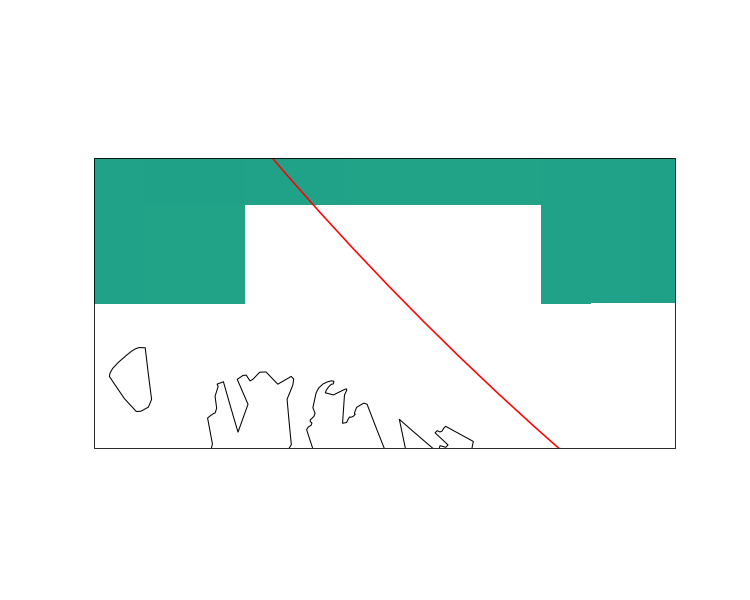

In [659]:
# Visualize data
fig = plt.figure(figsize=(10,8))
# Projection is Azimuthal Equidistant centered at lon=0, lat=90. Use x,y for projection. If other projection (ie. Plate Carree), use lon lat
proj = ccrs.AzimuthalEquidistant(central_longitude=0, central_latitude=90)
ax = plt.axes(projection=proj)
ax.set_global()
ax.coastlines()
# ax.gridlines(draw_labels=True)
# Add gridlines and labels
g = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--',zorder=5,x_inline=False, y_inline=False)
g.ylabels_right = False
g.xlabels_top = False
# Zoom into Nares Strait
# ax.set_extent([np.min(x)+2500000, np.max(x)-4500000, np.min(y)+3600000, np.max(y)-4400000], crs=proj)
# Plot velocity
im = ax.pcolormesh(lon,lat, u[0],transform=ccrs.PlateCarree()) 
# ax.quiver(x,y)

# ax.quiver(x, y, u[0], v[0],scale=100,transform=proj)

# Plot flux gate, first find start and end
# lon0 = -45
# lat0 = 83.4
# d0 = np.sqrt((lon-lon0)**2 + (lat-lat0)**2) 
# # index for lon and lat of lon0 and lat0 
# loc0 = np.unravel_index(np.argmin(np.array(d0), axis=None), d0.shape)

# lon1 = -75
# lat1 = 83.4
# d1 = np.sqrt((lon-lon1)**2 + (lat-lat1)**2) 
# loc1 = np.unravel_index(np.argmin(np.array(d1), axis=None), d1.shape)
# gate_bounds = np.linspace(-75,-45,20)
# for i in gate_bounds:
#     lat0 = 83.4 # constant lat
#     lon0 = i # add some constant value to lon each iteration
#     d = np.sqrt((lon-lon0)**2 + (lat-lat0)**2) 
#     loc = np.unravel_index(np.argmin(np.array(d), axis=None), d.shape)
#     ax.plot(lon[loc],lat[loc],'r*',transform=ccrs.PlateCarree())

# ax.plot(lon[200],lat[300],'y',transform=ccrs.PlateCarree())
ax.plot(range(0,360),np.repeat(83.4,360),'r',transform=ccrs.PlateCarree())

# ax.plot(x[loc0[1]],y[loc0[0]],'r*') 
# ax.plot(x[loc1[1]],y[loc1[0]],'y*')

# Flux gate. x is constant because constant latitude

cell_num = loc1[0]-loc0[0] # Number of grid cells in flux gate
# xloc = range(loc0[0],loc1[0]) # longitude
# yloc = range(loc0[1],loc1[1]) # latitude
# ax.plot(lon[np.repeat(xloc,abs(cell_num))],lat[yloc],'ro',transform=ccrs.PlateCarree())

# ax.plot(lon[loc0],lat[loc0],'r*',transform=ccrs.PlateCarree())
# ax.plot(lon[loc1],lat[loc1],'r*',transform=ccrs.PlateCarree())


# colorbar
# cb_ax = fig.add_axes([0.83, 0.08, 0.02, 0.8])
# cbar = fig.colorbar(im, cax=cb_ax)
# cbar.ax.tick_params(labelsize=15)
# cbar.set_label('u speed')

In [671]:
lon0 = -55
lat0 = 83.4
d0 = np.sqrt((lon-lon0)**2 + (lat-lat0)**2) 
# index for lon and lat of lon0 and lat0 
loc0 = np.unravel_index(np.argmin(np.array(d0), axis=None), d0.shape)


In [673]:
loc0

(163, 156)

In [678]:
lat[159,159]

<xarray.DataArray 'latitude' ()>
array(83.30127, dtype=float32)
Coordinates:
    x        float64 -5.264e+05
    y        float64 -5.264e+05
Attributes:
    standard_name:  latitude
    units:          degrees_north

For convenience, choose flux gate that has constant latitude, it will be a bit curved

### Calculate fluxes

Annual mean ice area flux (km^2)

In [515]:
(u[200,xloc,yloc].sum())*0.864 # total cm/s across gate 

<xarray.DataArray 'u' ()>
array(-32.65919934)
Coordinates:
    y        float64 -1.379e+06
    time     object 2020-07-19 00:00:00